In [4]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [5]:
im = cv2.imread('Canopic-Jar.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,230,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

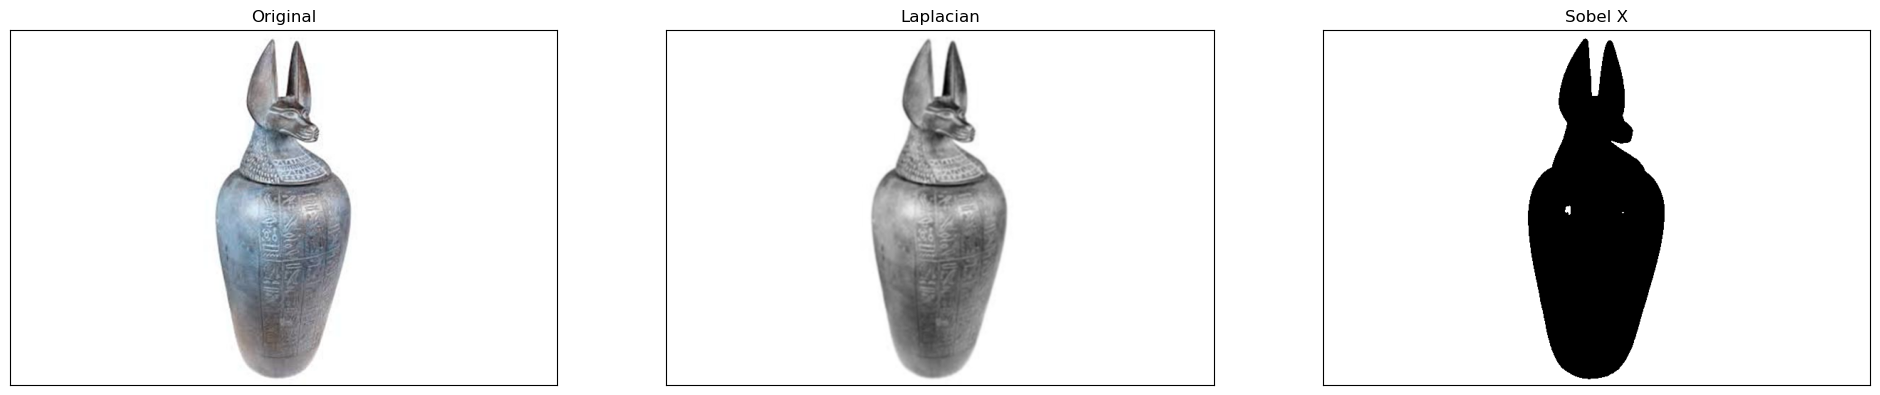

In [6]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
kernel3 = np.ones((3,3),np.uint8)
kernel5 = np.ones((5,5),np.uint8)
kernel7 = np.ones((7,7),np.uint8)
erosion = cv2.erode(thresh, kernel5, iterations = 1)
#dilation = cv2.dilate(thresh, kernel5, iterations = 1)
#closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel5)
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel5)


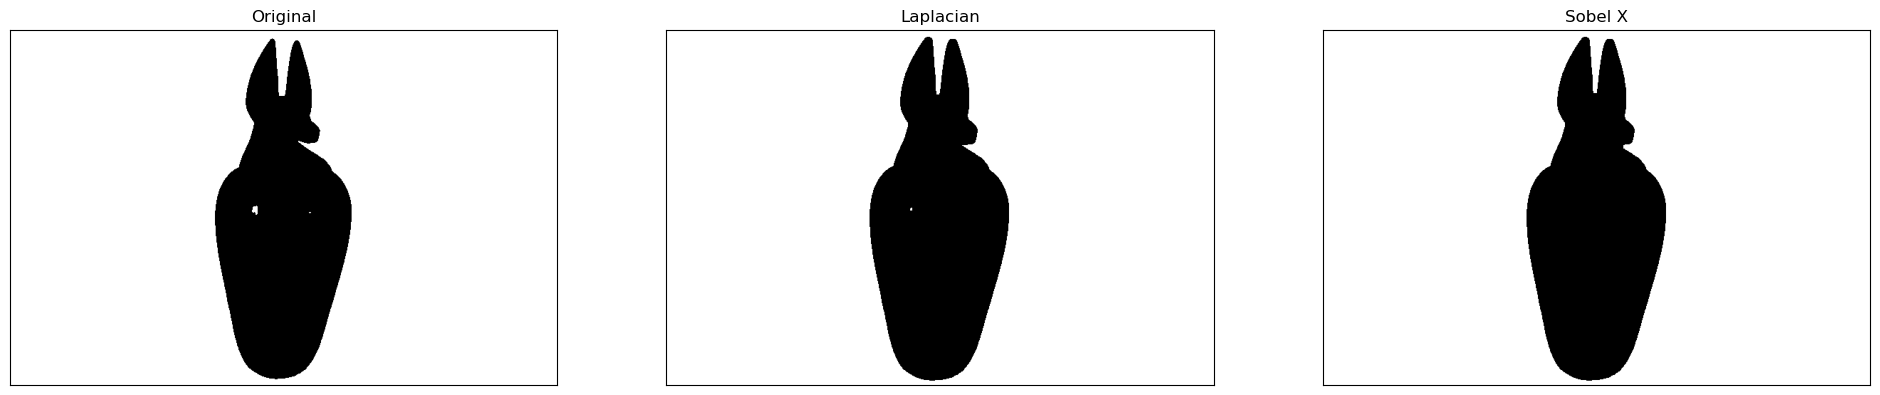

In [8]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(thresh,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(erosion,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(opening,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 0, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 1, (0,255,0), 3)


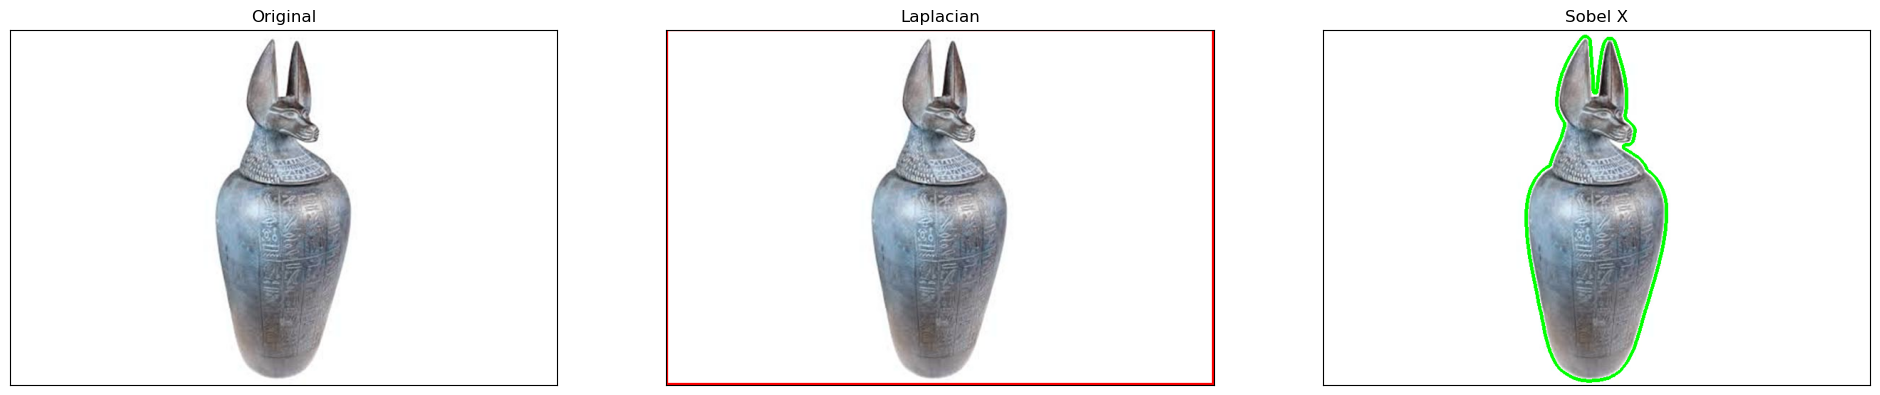

In [10]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
cnt = contours[1]
M = cv2.moments(cnt)
print(M)

{'m00': 62927.5, 'm10': 23972251.833333332, 'm01': 17254173.333333332, 'm20': 9258010841.25, 'm11': 6565935550.458333, 'm02': 5591924370.083333, 'm30': 3622969526197.75, 'm21': 2534770680116.5664, 'm12': 2124686980593.8333, 'm03': 1985060635109.7002, 'mu20': 125773616.49526978, 'mu11': -7047458.91993618, 'mu02': 860980070.4256153, 'mu30': 300248387.53125, 'mu21': 1674071213.0016098, 'mu12': -1693744479.6762085, 'mu03': -20342902161.712646, 'nu20': 0.03176205490489415, 'nu11': -0.0017797196533934241, 'nu02': 0.2174263333670341, 'nu30': 0.00030225917171298637, 'nu21': 0.0016852825835001557, 'nu12': -0.001705087603400001, 'nu03': -0.020479139982051066}


In [12]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [13]:
print(cx, cy)

380 274


In [14]:
area = cv2.contourArea(cnt)

In [15]:
print(area)

62927.5


In [16]:
perimeter = cv2.arcLength(cnt,True)

In [17]:
print(perimeter)

1361.7026588916779


In [18]:
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [19]:
print(epsilon)

13.61702658891678


In [20]:
print(approx)

[[[366  10]]

 [[380  89]]

 [[394  20]]

 [[410  18]]

 [[438 140]]

 [[422 167]]

 [[482 244]]

 [[437 448]]

 [[377 494]]

 [[318 452]]

 [[285 277]]

 [[291 223]]

 [[339 137]]

 [[335  62]]]


In [21]:
img1 = cv2.circle(img1,(cx,cy),5,(0,0,255),-1)

In [22]:
img2 = im.copy()
img2 = cv2.drawContours(img2, approx, -1, (0,0,255), 3)

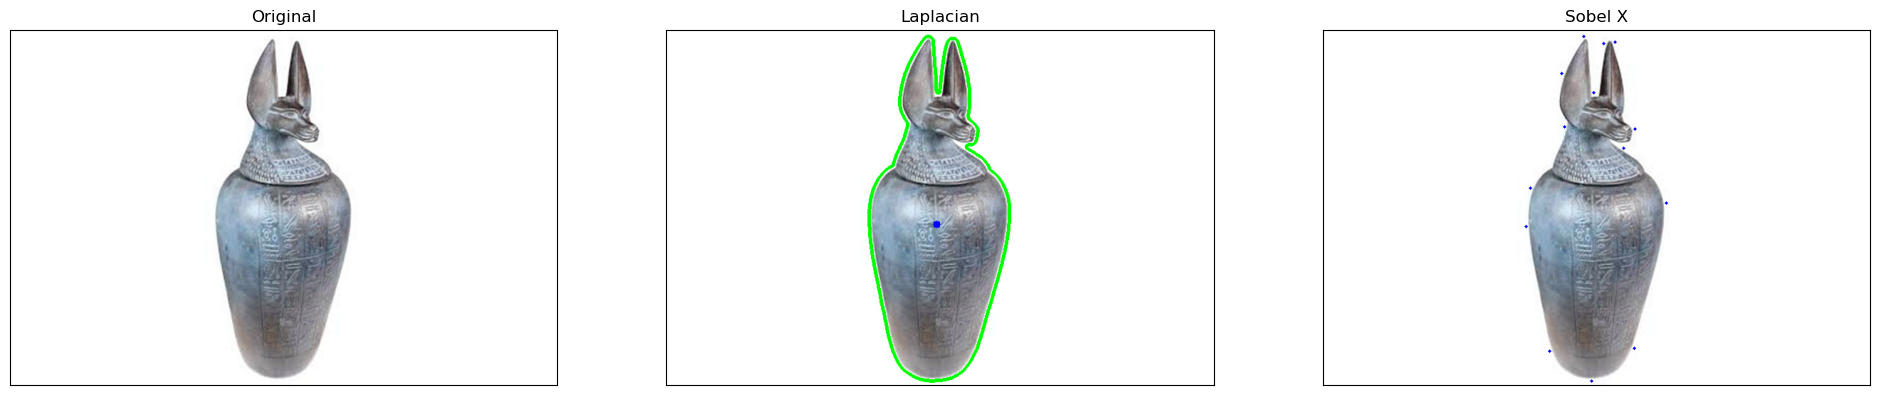

In [23]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [24]:
x,y,w,h = cv2.boundingRect(cnt)
img2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)

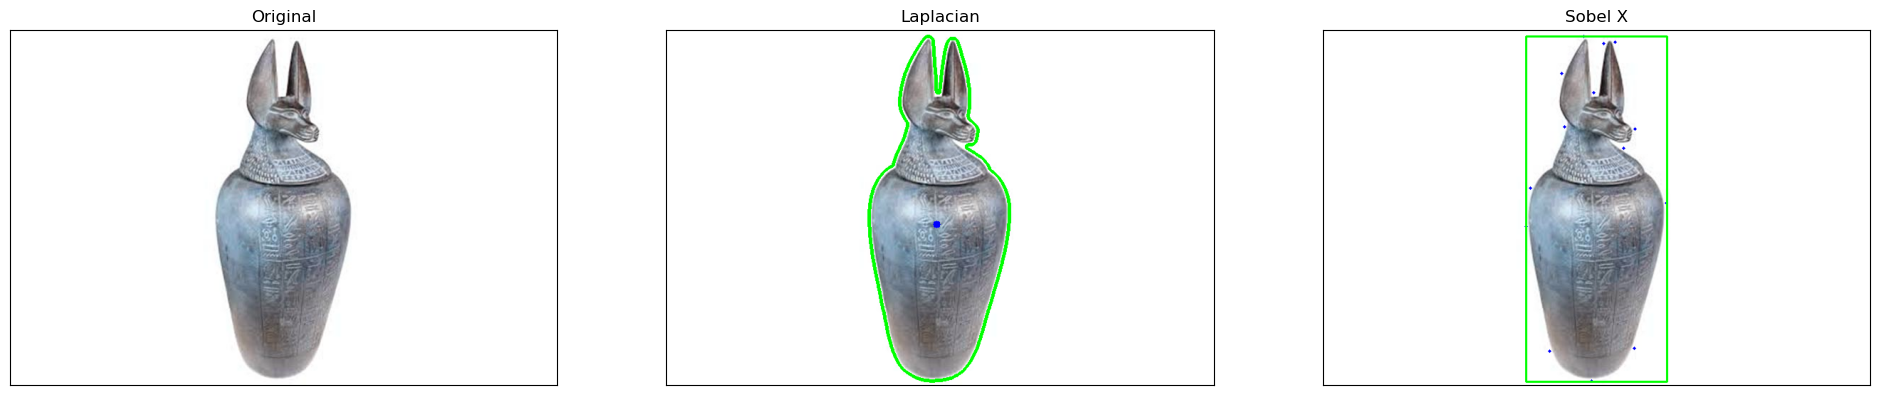

In [25]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [26]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int32(box)
img1 = cv2.drawContours(img1,[box],0,(0,0,255),2)

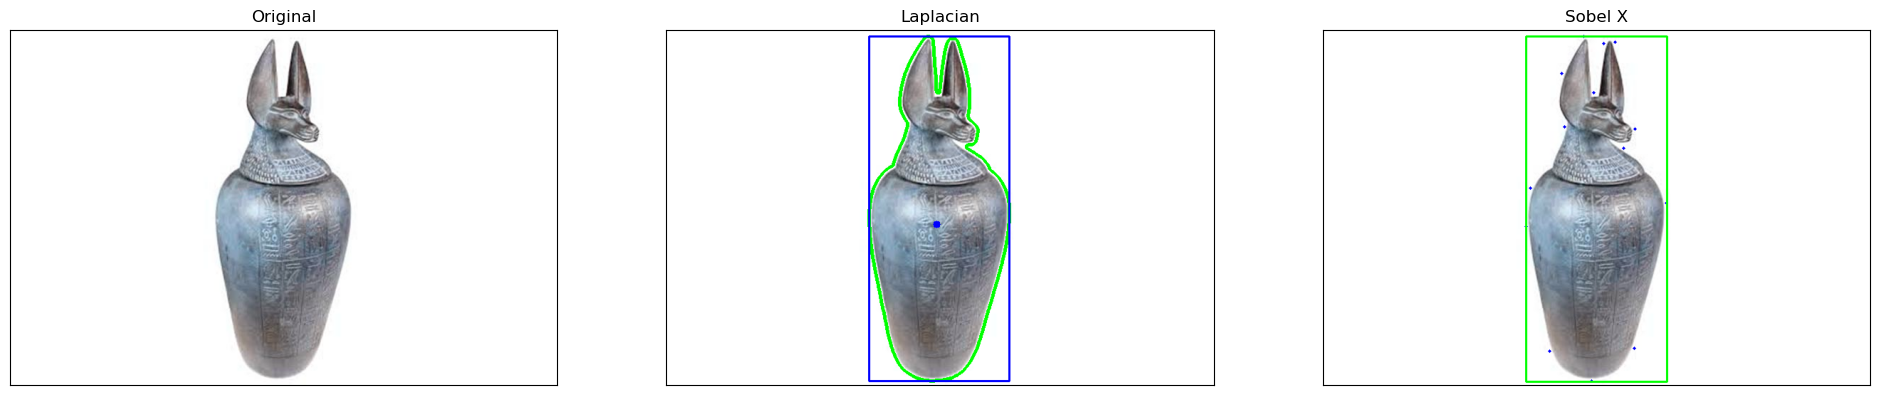

In [27]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img1 = cv2.circle(img1,center,radius,(0,255,0),2)

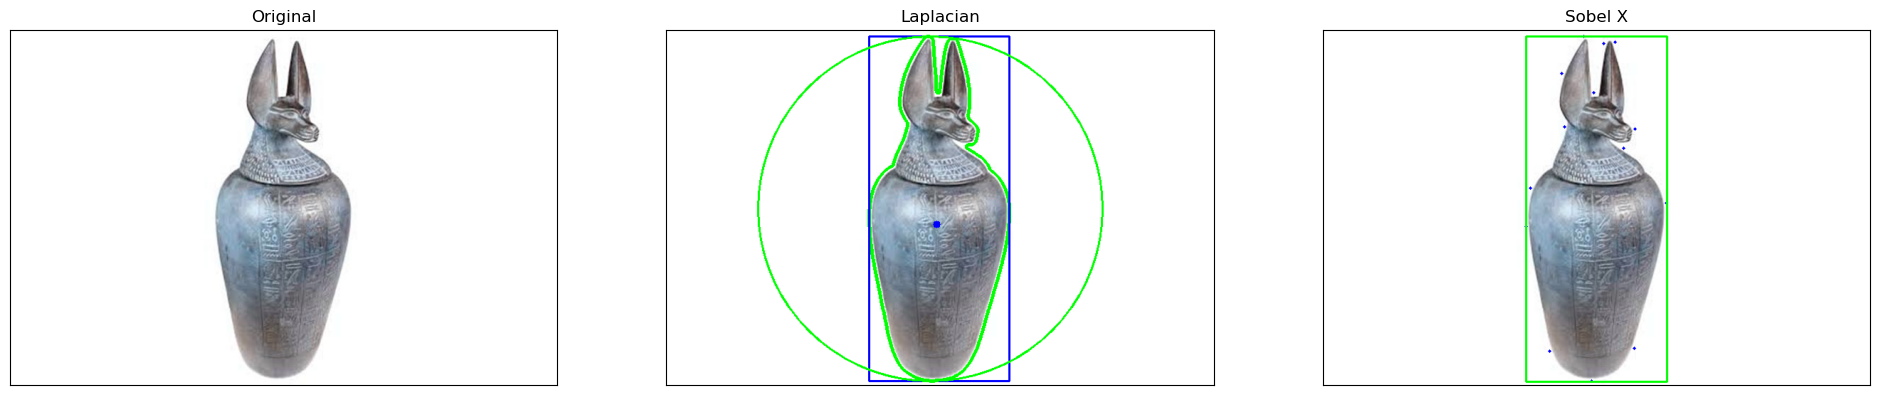

In [29]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
ellipse = cv2.fitEllipse(cnt)
img1 = cv2.ellipse(img1,ellipse,(0,255,0),2)

In [31]:
rows,cols = im.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img1 = cv2.line(img1,(cols-1,righty),(0,lefty),(0,255,0),2)

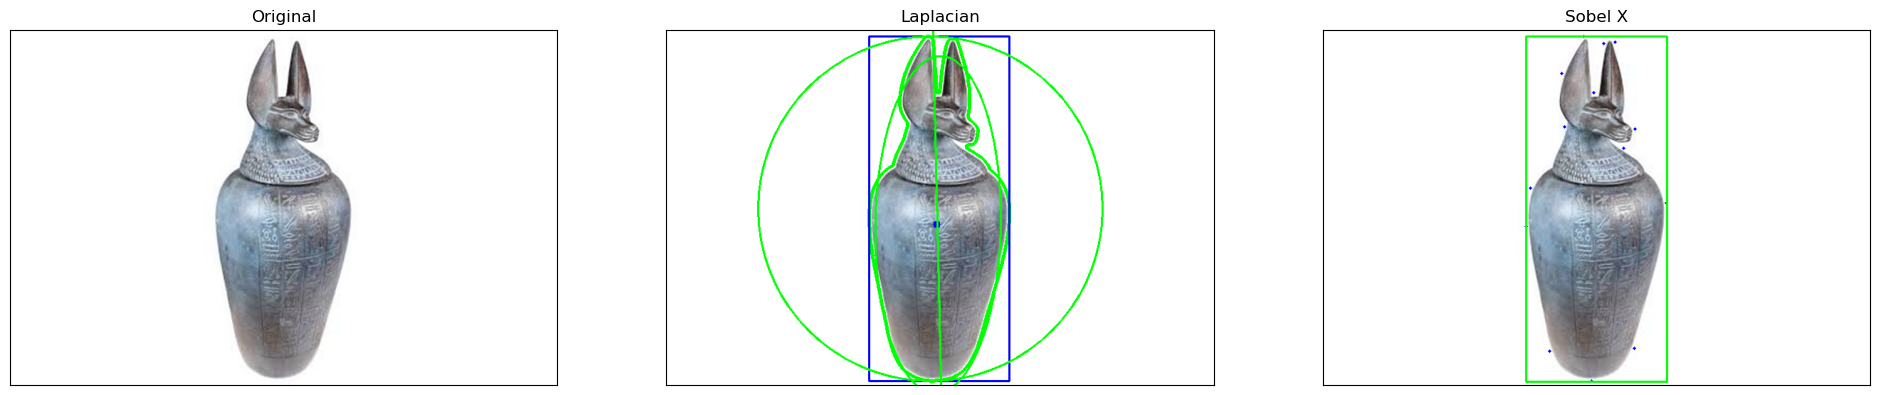

In [32]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [50]:
img = cv2.imread('./images.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(np.transpose(hist))

[[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00
  8.0000e+00 5.0000e+01 1.3270e+03 2.5700e+02 2.

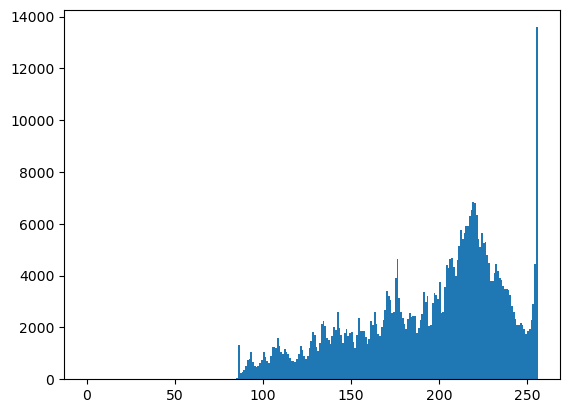

In [51]:
hist = np.bincount(img.ravel(),minlength=256)
plt.hist(img.ravel(),256,[0,256]); plt.show()

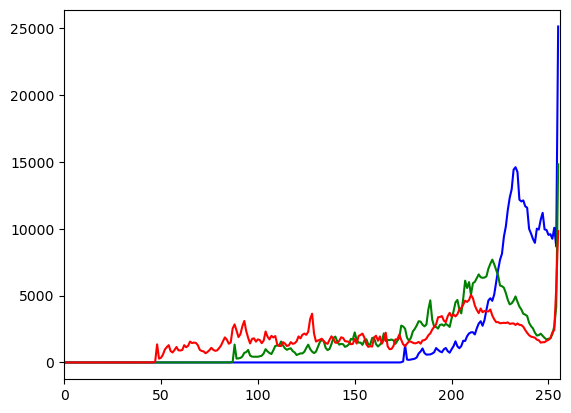

In [52]:
img = cv2.imread('./images.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


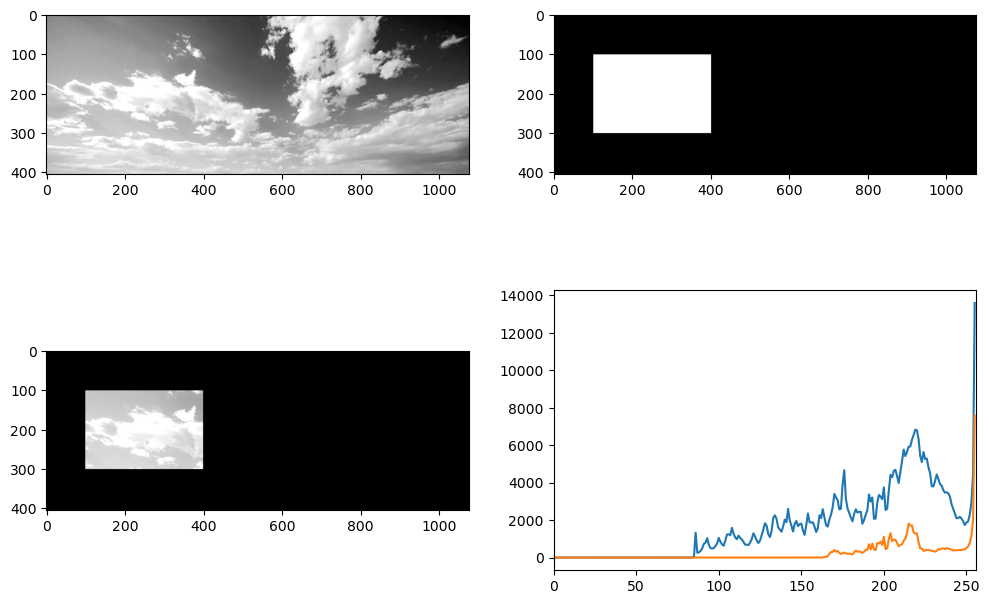

In [56]:
img = cv2.imread('./images.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


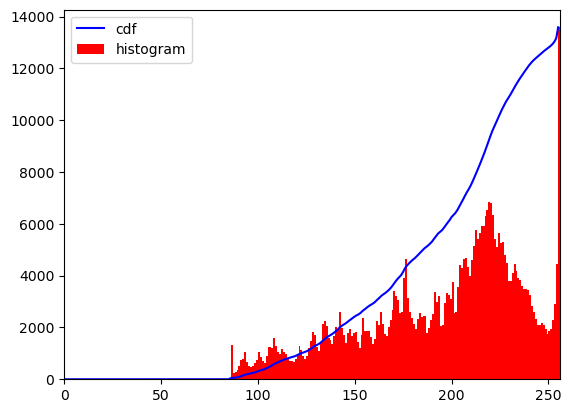

In [54]:
img = cv2.imread('./images.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [61]:
img = cv2.imread('./images.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)


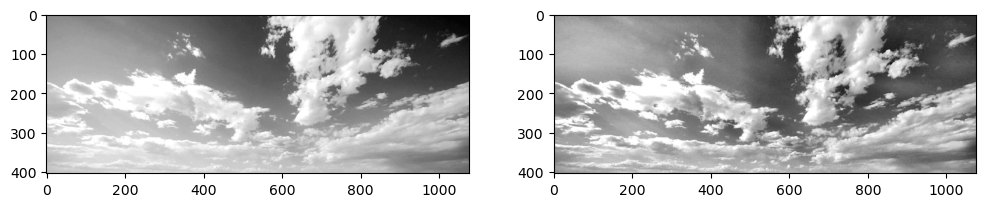

In [62]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(cl1, 'gray')
plt.show()